# Funnel Analysis for e-commerce website

#### Problem Statement: 
    
You are looking at data from an e-commerce website. The site is very simple and has just 4 pages:

The ﬁrst page is the home page. When you come to the site for the ﬁrst time, you can only land on the home page as a ﬁrst page.

From the home page, the user can perform a search and land on the search page.

From the search page, if the user clicks on a product, she will get to the payment page, where she is asked to provide payment information in order to buy that product.

If she does decide to buy, she ends up on the conﬁrmation page

The company CEO isn't very happy with the volume of sales and, especially, of sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you could suggest how conversion rate can be improved.

In [216]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
home = pd.read_csv('home_page_table.csv')
search = pd.read_csv('search_page_table.csv')
payment = pd.read_csv('payment_page_table.csv')
confirmation = pd.read_csv('payment_confirmation_table.csv')
users = pd.read_csv('user_table.csv')

In [246]:
home.head(3)

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page


In [247]:
search.head(3)

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page


In [248]:
payment.head(3)

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page


In [249]:
confirmation.head(3)

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page


In [250]:
users.head(3)

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male


### 1. Data understanding

In [159]:
# combine four datasets together 
combined = users.merge(home).merge(search, how = 'left', on = 'user_id', suffixes = ('_home', '_search')).merge(payment, how = 'left', on = 'user_id').merge(confirmation, how = 'left', on = 'user_id', suffixes = ('_payment', '_confirmation'))
combined.head(4)

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN


In [130]:
print('Start date:', combined.date.min())

Start date: 2015-01-01


In [131]:
print('End date:', combined.date.max())

End date: 2015-04-30


In [128]:
print('Total volume of visitors:', len(combined['user_id'].unique()))

Total volume of visitors: 90400


In [132]:
print('Percentage of male visitors:', len(combined[combined['sex'] == 'Male']) / len(combined))

Percentage of male visitors: 0.5013827433628318


In [135]:
print('Percentage of Desktop users:', len(combined[combined['device'] == 'Desktop'])/ len(combined))

Percentage of Desktop users: 0.665929203539823


#### Overview of datasets:

The dataset consists of the page viewing activities of 90400 site visitors from 2015-01-01 to 2015-04-30. There's a roughly 50/50 split between male visitors and female visitors. Desktop users are 66.6% of the population while mobile users are 33.4%. 

### 2. Conversion rates by device

In [181]:
def conversion_rate(df):
    """ Computes conversion rates from home page to search page, from search_page to payment_page,  
        and payment_page to comfirmation_page """
    
    home_to_search = round(sum(df.page_search.notnull()) / sum(df.page_home.notnull()), 3)
    search_to_payment = round(sum(df.page_payment.notnull()) / sum(df.page_search.notnull()), 3)
    payment_to_confirmation = round(sum(df.page_confirmation.notnull()) / sum(df.page_payment.notnull()), 3)
    
    return [home_to_search, search_to_payment, payment_to_confirmation]

In [231]:
conversions_mobile = conversion_rate(combined[combined['device'] == 'Mobile'])
conversions_desktop = conversion_rate(combined[combined['device'] == 'Desktop'])
columns = {'mobile' : conversions_mobile,  'desktop': conversions_desktop}
print('Conversion rates by device:')
df_conversion = pd.DataFrame(data = columns, index = ['home -> search', 'search -> payment', 'payment -> confirmation'])
df_conversion

Conversion rates by device:


,mobile,desktop
home -> search,0.5,0.50
search -> payment,0.2,0.10
payment -> confirmation,0.1,0.05


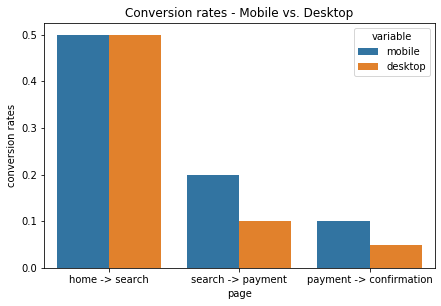

In [245]:
df_plot = pd.melt(df_conversion.reset_index(), id_vars = "index")
fig, ax = plt.subplots(figsize=(7,4.5))
sns.barplot(x = 'index', y = 'value', data = df_plot, hue = 'variable')
ax.set(xlabel='page', ylabel='conversion rates', title = "Conversion rates - Mobile vs. Desktop");

Based on the table and the side-by-side bar plot above, we can see that 

- For both mobile and desktop users who visited the home page, 50% of them performed a search. 

- For mobile users who performed a search, 20% of those clicked on a product and got to the payment page; for desktop users, only 10% got to the payment page. 

- For mobile users who landed on the payment page, 10% of those decided to buy the product; however, for desktop users, only 5% did that. 

For search page and payment page, the conversion rates of desktop users is only half of the conversion rates of mobile users. 

Therefore, the team should focus on improving the conversion rates for desktop users. This could be achieved by A/B testing on the UI design or usability testing for the search page and payment page of desktop to make it easy to navigate and friendlier to use. 